# RANDOM THINGS

In [ ]:
import pandas as pd

# Sample CSV loading
data = {
    '2018': [82, 151, 316, 219, 292, 214, 319, 445.5],
    '2019': [85, 175, 332, 221, 274, 231, 317, 464],
    '2020': [83, 176, 287, 215, 266, 227, 356, 442],
    '2021': [81, 184, 272, 223, 375, 270, 387, 437],
    '2022': [85, 194, 284, 236, 373, 258, 372, 451],
    '2023': [87, 217, 292, 275, 331, 284, 368, 486],
    '2024': [68, 206, 239, 241, 250, 256, 362, 407],
    '2025': [65, 214, 239, 244, 235, 261, 371, 412]
}

df = pd.DataFrame(data)
# Function to convert international to national rankings
def international_to_national_rankings(df):
    # Use argsort twice to get rankings: once for sorting order, second to get ranks
    ranked_df = df.apply(lambda x: x.argsort().argsort() + 1)
    return ranked_df

# Apply the function
national_ranks = international_to_national_rankings(df)

# Print or return the transformed DataFrame
print(national_ranks)
# Display the results
print("National Rankings by Year:")
print(national_ranks)


# Bar chart for rankings

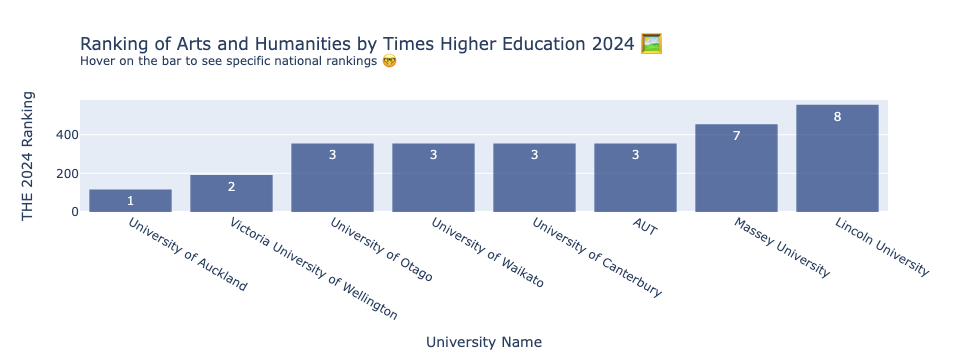

In [2]:
import pandas as pd
import plotly.graph_objects as go

# Subject'Arts and humanities'
#import dataset

df = pd.read_csv('data.csv',
                 header=0,
                 usecols=["University Name", "Arts and humanities ranking THE2024"])

# Melt the dataframe to make it suitable for plotting
# df_melted = df.melt(id_vars=["University Name"], 
#                     value_vars=["Arts and humanities ranking THE2024"],
#                     var_name="Subject", value_name="Subject Field")

# y values for the direct labels to show the national rankings
y=[1, 3, 7, 2, 3, 3, 8, 3]

#create bar chart
fig = go.Figure(data=[
    go.Bar(
        x=df['University Name'], 
        y=df['Arts and humanities ranking THE2024'],
        hovertext=[
            '1st place nationally, Ranked 113 in the world by THE 2024', 
            '=3rd place nationally, Ranked 350.5 in the world by THE 2024', 
            '4th place nationally, Ranked 450.5 in the world by THE 2024',
            '2nd place nationally, Ranked 188 in the world by THE 2024',
            '=3rd place nationally, Ranked 350.5 in the world by THE 2024',
            '=3rd place nationally, Ranked 350.5 in the world by THE 2024',
            '5th place nationally, Ranked 550.5 in the world by THE 2024',
            '=3rd place nationally, Ranked 350.5 in the world by THE 2024'
        ],
        text=y,  # Displaying the ranking as number on the bar
        textposition='auto'   
    )
])


# Change the bar mode
# smallest ranking to largest ranking
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total ascending'})

# fig.update_layout(barmode='group')
fig.update_layout(
    title_text='Ranking of Arts and Humanities by THE 2024',
    barmode='group',
    xaxis_title="University Name",
    yaxis_title="THE 2024 Ranking"
),
fig.update_layout(
    title=go.layout.Title(
        text="Ranking of Arts and Humanities by Times Higher Education 2024 🖼️<br><sup>Hover on the bar to see specific national rankings 🤓</sup>",
        xref="paper",
        x=0
    ),)

fig.update_traces(marker_color='rgb(1,33,105)', marker_line_color='rgb(1,33,105)',
                  marker_line_width=1.5, opacity=0.6)


fig.show() 

In [ ]:
#categorise pattern fill
fig = px.bar(df_melted, x='University Name', y='Subject Field', color="Subject",
             pattern_shape="Subject", pattern_shape_sequence=[".", "x", "+"])

# LINE CHART FOR RANKINGS

In [ ]:
!pip install pandas plotly


In [ ]:

import pandas as pd

# Sample data based on the provided rankings and university names
data = {
    'University Name': [
        'University of Auckland', 'University of Otago', 'Massey University', 
        'Victoria University of Wellington', 'University of Waikato', 
        'University of Canterbury', 'Lincoln University', 'AUT'
    ],
    '2018 QS Rankings': [82, 151, 316, 219, 292, 214, 319, 445.5],
    '2019 QS Rankings': [85, 175, 332, 221, 274, 231, 317, 464],
    '2020 QS Rankings': [83, 176, 287, 215, 266, 227, 356, 442],
    '2021 QS Rankings': [81, 184, 272, 223, 375, 270, 387, 437],
    '2022 QS Rankings': [85, 194, 284, 236, 373, 258, 372, 451],
    '2023 QS Rankings': [87, 217, 292, 275, 331, 284, 368, 486],
    '2024 QS Rankings': [68, 206, 239, 241, 250, 256, 362, 407],
    '2025 QS Rankings': [65, 214, 239, 244, 235, 261, 371, 412]
}

# Create DataFrame
df = pd.DataFrame(data)



# Melt the DataFrame to convert from wide to long format
df_long = df.melt(id_vars=['University Name'], var_name='Year', value_name='Ranking')

# Extract the year from the 'Year' column
df_long['Year'] = df_long['Year'].str.extract('(\d{4})').astype(int)

import plotly.express as px

# Create the line chart
fig = px.line(df_long, x='Year', y='Ranking', color='University Name', 
              title='International QS Rankings Over the Years', 
              labels={'Ranking': 'QS Ranking', 'Year': 'Year'},
              markers=True)

# Update layout for clarity
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='QS Ranking',
    yaxis=dict(autorange='reversed'),  # Rankings: lower is better
    legend_title='University'
)
# fig.add_annotation(x=2018, y=151,
#             text="University of Otago",
#             showarrow=True,
#             arrowhead=1
#                   )
fig.add_annotation(x=2018, y=82,
            text="University of Auckland",
            showarrow=True,
            arrowhead=1,
                   font=dict(
            family="Courier New, monospace",
            size=16,
            color="#000080"
            ),
        align="center",
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=20,
        ay=-30,
                  )

  
    
fig.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np

title = 'Main Source for News'
labels = ['Television', 'Newspaper', 'Internet', 'Radio']
colors = ['rgb(67,67,67)', 'rgb(115,115,115)', 'rgb(49,130,189)', 'rgb(189,189,189)']

mode_size = [8, 8, 12, 8]
line_size = [2, 2, 4, 2]

x_data = np.vstack((np.arange(2018, 2025),)*4)

y_data = np.array([
    [82, 85, 83, 81, 85, 87, 68],
    [151, 175, 176, 184, 194, 217, 206],
    [316, 332, 287, 272, 284, 292, 239],
    [219, 221, 215, 223, 236, 275, 241],
    [292, 274, 266, 375, 373, 331, 250],
    [214, 231, 227, 270, 258, 284, 256],
    [319, 317, 356, 387, 372, 368, 362],
    [445.5, 464, 442, 437, 451, 486, 407]
])

fig = go.Figure()

for i in range(0, 4):
    fig.add_trace(go.Scatter(x=x_data[i], y=y_data[i], mode='lines',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
    ))

    # endpoints
    fig.add_trace(go.Scatter(
        x=[x_data[i][0], x_data[i][-1]],
        y=[y_data[i][0], y_data[i][-1]],
        mode='markers',
        marker=dict(color=colors[i], size=mode_size[i])
    ))

fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False,
    plot_bgcolor='white'
)

annotations = []

# Adding labels
for y_trace, label, color in zip(y_data, labels, colors):
    # labeling the left_side of the plot
    annotations.append(dict(xref='paper', x=0.05, y=y_trace[0],
                                  xanchor='right', yanchor='middle',
                                  text=label + ' {}%'.format(y_trace[0]),
                                  font=dict(family='Arial',
                                            size=16),
                                  showarrow=False))
    # labeling the right_side of the plot
    annotations.append(dict(xref='paper', x=0.95, y=y_trace[],
                                  xanchor='left', yanchor='middle',
                                  text='{}%'.format(y_trace[7]),
                                  font=dict(family='Arial',
                                            size=16),
                                  showarrow=False))
# Title
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Main Source for News',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Source: PewResearch Center & ' +
                                   'Storytelling with data',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

#creating the line chart
df = pd.read_csv('data.csv',
                 header=0,
                 usecols=["University Name", "N2018", "N2019", "N2020", "N2021", "N2022", "N2023", "N2024", "N2025"])

# Melt the DataFrame to convert from wide to long format
df_long = df.melt(id_vars=['University Name'], var_name='Year', value_name='Ranking')

fig_line = px.line(df_long, x="Year", y="Ranking", color='University Name')

# Update layout for clarity
fig_line.update_layout(
    xaxis_title='Year',
    yaxis_title='QS Ranking',
    yaxis=dict(autorange='reversed'),  # Rankings: lower is better
    legend_title='University'
)
fig_line.update_layout(
    title=go.layout.Title(
        text="International QS rankings of New Zealand Universities<br><sup>Data from QS Top Universities from 2018 to 2025. (https://www.topuniversities.com)</sup>",
        xref="paper",
        x=0
    ),)


# radar chart

In [ ]:
fig.update_traces(fill='toself')

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Load data
df = pd.read_csv('data.csv', header=0, usecols=[
    "University Name", 
    "Academic reputation (QS25)", 
    "Teaching quality (THE24)", 
    "Employment Outcomes (QS25)", 
    "Research quality (THE24)", 
    "International Research Network (QS25)", 
    "Employer Reputation (QS25)"
])

# Reshape the DataFrame
df_melted = df.melt(id_vars=["University Name"], var_name="Metric", value_name="Value")



# Get unique university names
universities = df['University Name'].unique()

# Generate a radar chart for each university
for university in universities:
    # Filter data for one university
    df_uni = df_melted[df_melted['University Name'] == university ]

    # Create the radar chart using Plotly Express
    fig = px.line_polar(df_uni, r='Value', theta='Metric', line_close=True,
                        title=f"Metrics for {university}")

    # Update layout to improve readability
    fig.update_traces(fill='toself')  # Optional: fill the area inside the radar
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, df_uni['Value'].max() + 10]  # Adjust the radial axis to fit the data
            )
        ),
        showlegend=False  # Hide legend if not necessary
    )
fig_line.update_layout(
    title=go.layout.Title(
        text="International QS rankings of New Zealand Universities<br><sup>Data from QS Top Universities from 2018 to 2025. (https://www.topuniversities.com)</sup>",
        xref="paper",
        x=0
    ),)
    # Show the plot
fig.show()




In [ ]:
# Reshape the DataFrame
df_melted = df.melt(id_vars=["University Name"], var_name="Metric", value_name="Value")

# Get unique university names
universities = df['University Name'].unique()

# Generate a radar chart for each university
for university in universities:
    # Filter data for one university
    df_uni = df_melted[df_melted['University Name'] == university ]

    # Create the radar chart using Plotly Express
    fig_radar = px.line_polar(df_uni, r='Value', theta='Metric', line_close=True,
                        title=f"Metrics for {university}")

    # Update layout to improve readability
    fig_radar.update_traces(fill='toself')  # Optional: fill the area inside the radar
    fig_radar.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, df_uni['Value'].max() + 10]  # Adjust the radial axis to fit the data
            )
        ),
        showlegend=False  # Hide legend if not necessary
    )
    

EXTRA(for fun)

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure(go.Scattergeo())
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# LAYOUT

In [5]:
# Run this app with `python app.py` and
# visit http://127.0.0.1:8050/ in your web browser.


from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})

fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for your data.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

if __name__ == "__main__":
    app.run_server(debug=True, port=8058)
